In [6]:
groceries_df=pd.read_csv(r'C:/Users/Win 10/Desktop/Market-Basket-Analysis/groceries_df.csv')
groceries_df

,Bill No,Date,Barcode,Item Name,Qty,Rate,Amount,Tax Amt,Net Amount,Year,Month,Day,Day of week
0,1,2022-04-01,37974,B2B A4 SHEETS 70GSM 290,1.000,200.0,178.57,21.43,200.00,2022,April,1,Friday
1,3,2022-04-01,46291,O BALLON 80,1.000,80.0,80.00,0.00,80.00,2022,April,1,Friday
2,3,2022-04-01,8901248253161,EMAMI FAIR AND HANDSOME CREAM 15G 25,1.000,30.0,24.66,4.44,29.10,2022,April,1,Friday
3,3,2022-04-01,34209,O DECORATION ITEM 40,1.000,40.0,40.00,0.00,40.00,2022,April,1,Friday
4,4,2022-04-01,4902430710275,ORALB SENSITIVE EXTRA SOFT BRUSH 2N,1.000,78.0,64.12,11.54,75.66,2022,April,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387671,84538,2022-10-31,7930,Y TOMATO 1KG,0.098,27.0,2.65,0.00,2.65,2022,October,31,Monday
387672,84538,2022-10-31,7928,Y ONION 1 KG,0.098,35.0,3.43,0.00,3.43,2022,October,31,Monday
387673,84538,2022-10-31,8901725000561,SUNFEAST MARIE LIGHT OATS FIBRE BISCUITS 60G,1.000,10.0,8.47,1.53,10.00,2022,October,31,Monday
387674,84340,2022-10-31,8901063363823,BRITANNIA GOBBLES MILK CAKE 50G,2.000,15.0,24.92,4.48,29.40,2022,October,31,Monday


In [7]:
# Function to strip leading characters- Batch names O,Q and Y and empty spaces

import re

def rename_10(item_name):
    return re.sub(r'^[RS10]\s*', 'PEN', item_name)

groceries_df['Item Name'] = groceries_df['Item Name'].apply(rename_10)

def clean_item_name(item_name):
    return re.sub(r'^[OQXY]\s*', '', item_name)

# Apply function to 'Item Name' column
groceries_df['Item Name'] = groceries_df['Item Name'].apply(clean_item_name)

def removenum(item_name):
    return re.sub(r'^[\d.-]+\s*', '', item_name)

# Apply function to 'Item Name' column
groceries_df['Item Name'] = groceries_df['Item Name'].apply(removenum)

groceries_df

,Bill No,Date,Barcode,Item Name,Qty,Rate,Amount,Tax Amt,Net Amount,Year,Month,Day,Day of week
0,1,2022-04-01,37974,B2B A4 SHEETS 70GSM 290,1.000,200.0,178.57,21.43,200.00,2022,April,1,Friday
1,3,2022-04-01,46291,BALLON 80,1.000,80.0,80.00,0.00,80.00,2022,April,1,Friday
2,3,2022-04-01,8901248253161,EMAMI FAIR AND HANDSOME CREAM 15G 25,1.000,30.0,24.66,4.44,29.10,2022,April,1,Friday
3,3,2022-04-01,34209,DECORATION ITEM 40,1.000,40.0,40.00,0.00,40.00,2022,April,1,Friday
4,4,2022-04-01,4902430710275,RALB SENSITIVE EXTRA SOFT BRUSH 2N,1.000,78.0,64.12,11.54,75.66,2022,April,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387671,84538,2022-10-31,7930,TOMATO 1KG,0.098,27.0,2.65,0.00,2.65,2022,October,31,Monday
387672,84538,2022-10-31,7928,ONION 1 KG,0.098,35.0,3.43,0.00,3.43,2022,October,31,Monday
387673,84538,2022-10-31,8901725000561,PENUNFEAST MARIE LIGHT OATS FIBRE BISCUITS 60G,1.000,10.0,8.47,1.53,10.00,2022,October,31,Monday
387674,84340,2022-10-31,8901063363823,BRITANNIA GOBBLES MILK CAKE 50G,2.000,15.0,24.92,4.48,29.40,2022,October,31,Monday


In [9]:
# Group by 'Bill Number' and create new columns for each item
df_grouped = groceries_df.groupby('Bill No')['Item Name'].apply(lambda x: pd.Series(x.values)).unstack().reset_index()
# Rename columns
df_grouped.columns = ['Bill Number'] + [f'{i+1}' for i in range(df_grouped.shape[1]-1)]
df_grouped=df_grouped.drop(columns=['Bill Number'])
df_grouped.head(20)

,1,2,3,4,5,6,7,8,9,10,...,68,69,70,71,72,73,74,75,76,77
0,B2B A4 SHEETS 70GSM 290,HALDIRAMS 200G MOONG DAL 50,BRITANNIA 120G NUTRICHOICE BISCUIT 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BRITANNIA MILK BIKIS 120G BISCUIT 15,BRITANNIA MARIE GOLD 10,GROUNDNUT SWEETS 75G,BIG MURUKU 56,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BALLON 80,EMAMI FAIR AND HANDSOME CREAM 15G 25,DECORATION ITEM 40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RALB SENSITIVE EXTRA SOFT BRUSH 2N,PENENSODYNE SOFT 3PACK TOOTHBRUSH 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P MEGA TOP MONTEX BALL PEN 1N 10,CLASSMATE UNRULED 172P BOUND NOTE,BENELUX 530 FILE 55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BRITANNIA MILKBIKIS BISCUITS 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,FOGG ONE BRAVE BODY SPRAY 120ML,KIWI COLOUR SHINE BROWN 40ML,FEVIBOND 25ML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,FEVIKWIK,FEVIKWIK 2 G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MILK 500ML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,VELLAM 1 KG,PENAJARAMS PUFFED RICE 90G 20,UAKER 600G OATS,WHITE AVUL 100G,GROUNET FRIED 100G,POTTU KADALAI 100G,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Drop the rows which has NaN value at the 2nd column (column index 1)
df_grouped = df_grouped.dropna(subset=[df_grouped.columns[1]], axis=0)
# Drop columns from 11 to 77
df_grouped.drop(columns=df_grouped.columns[10:77], inplace=True)
df_grouped.head(20)
df_grouped

,1,2,3,4,5,6,7,8,9,10
0,B2B A4 SHEETS 70GSM 290,HALDIRAMS 200G MOONG DAL 50,BRITANNIA 120G NUTRICHOICE BISCUIT 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BRITANNIA MILK BIKIS 120G BISCUIT 15,BRITANNIA MARIE GOLD 10,GROUNDNUT SWEETS 75G,BIG MURUKU 56,NaN,NaN,NaN,NaN,NaN,NaN
2,BALLON 80,EMAMI FAIR AND HANDSOME CREAM 15G 25,DECORATION ITEM 40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RALB SENSITIVE EXTRA SOFT BRUSH 2N,PENENSODYNE SOFT 3PACK TOOTHBRUSH 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P MEGA TOP MONTEX BALL PEN 1N 10,CLASSMATE UNRULED 172P BOUND NOTE,BENELUX 530 FILE 55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
84619,CADBURY DAIRY MILK FRUIT @ NUT 55G 80,TAPE 35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84620,FEVICRYL ACRYLIC COLOURS WHITE 27 15ML 20,FEVICRYL ACRYLIC COLOURS BLACK 15 ML 20,FEVICRYL ACRYLIC COLOURS CRIMSON 04 15ML 20,RIGAMI SOFT TISSUE ROLL 200G TISSUES 72,PAKKU PLATE,NaN,NaN,NaN,NaN,NaN
84621,PENUNPRIYA SUNFLOWER OIL 500ML,HAMAM NEEM SOAP 75G,THUVARAM PARUPU 250 G,NABATI RICHOCO WAFER,NABATI RICHOCO 35G 10,POTTU KADALAI 100G,GINGER 1 KG,NaN,NaN,NaN
84622,KIT KAT 18.5G,FEVICRYL SILVER 910 COLOUR 10ML 20,FEVICRYL ACRYLIC COLOURS CRIMSON 04 15ML 20,PENS18,PAIT BRUSH,NaN,NaN,NaN,NaN,NaN


In [11]:
# Export to new csv file
df_grouped.to_csv(r'C:/Users/Win 10/Desktop/Market-Basket-Analysis/basket_df.csv',index=False)

In [5]:
# For importing, cleaning and transforming data
import numpy as np
import pandas as pd

# For data analysis
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# For visualisation
import matplotlib.pyplot as plt
import pandas as pd

# importing the basket dataframe
basket_df=pd.read_csv(r'C:/Users/Win 10/Desktop/Market-Basket-Analysis/basket_df.csv')

# Filling the NaN values with the word 'NA'
basket_df.fillna('NA', inplace=True)

# Formatting dataframe into list of lists
basket_df_list = basket_df.values.tolist()

# Removing 'NA' from each list
for i in range(len(basket_df_list)):
    basket_df_list[i] = [x for x in basket_df_list[i] if not x=='NA']

# Transactional encoding
te = TransactionEncoder()
te_ary = te.fit(basket_df_list).transform(basket_df_list)

df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori Algorithm

frequent_itemsets = apriori(df_encoded, min_support=0.003, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)

# confidence tells us the how likely the consequent will be bought when the antecedents is bought
rules.sort_values(by='confidence', ascending=False).head(10)

# lift tells us the strength of the rule
rules.sort_values(by='lift', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
45,(ONION 1 KG),"(CHILLI GREEN 1 KG, TOMATO 1KG)",0.025748,0.008808,0.005383,0.209079,23.738119,0.005157,1.253213,0.983189
40,"(CHILLI GREEN 1 KG, TOMATO 1KG)",(ONION 1 KG),0.008808,0.025748,0.005383,0.611215,23.738119,0.005157,2.505888,0.966385
50,(ONION 1 KG),"(TOMATO 1KG, POTATO 1 KG)",0.025748,0.006075,0.003589,0.139386,22.944704,0.003433,1.154903,0.981694
47,"(TOMATO 1KG, POTATO 1 KG)",(ONION 1 KG),0.006075,0.025748,0.003589,0.590786,22.944704,0.003433,2.380787,0.962263
44,(TOMATO 1KG),"(CHILLI GREEN 1 KG, ONION 1 KG)",0.030259,0.008018,0.005383,0.177911,22.190259,0.005141,1.206660,0.984732
41,"(CHILLI GREEN 1 KG, ONION 1 KG)",(TOMATO 1KG),0.008018,0.030259,0.005383,0.671458,22.190259,0.005141,2.951649,0.962653
43,(CHILLI GREEN 1 KG),"(TOMATO 1KG, ONION 1 KG)",0.018093,0.014241,0.005383,0.297543,20.894070,0.005126,1.403303,0.969684
42,"(TOMATO 1KG, ONION 1 KG)",(CHILLI GREEN 1 KG),0.014241,0.018093,0.005383,0.378035,20.894070,0.005126,1.578717,0.965894
49,(TOMATO 1KG),"(ONION 1 KG, POTATO 1 KG)",0.030259,0.005696,0.003589,0.118607,20.822074,0.003417,1.128105,0.981679
48,"(ONION 1 KG, POTATO 1 KG)",(TOMATO 1KG),0.005696,0.030259,0.003589,0.630058,20.822074,0.003417,2.621331,0.957428


In [6]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ONION 1 KG),(CARROT 1 KG),0.025748,0.011425,0.003309,0.128517,11.248353,0.003015,1.134359,0.935177
1,(CARROT 1 KG),(ONION 1 KG),0.011425,0.025748,0.003309,0.289625,11.248353,0.003015,1.371462,0.921628
2,(TOMATO 1KG),(CARROT 1 KG),0.030259,0.011425,0.003770,0.124592,10.904847,0.003424,1.129273,0.936640
3,(CARROT 1 KG),(TOMATO 1KG),0.011425,0.030259,0.003770,0.329971,10.904847,0.003424,1.447312,0.918795
4,(CHILLI GREEN 1 KG),(EGG),0.018093,0.055020,0.003112,0.171975,3.125696,0.002116,1.141246,0.692602
5,(EGG),(CHILLI GREEN 1 KG),0.055020,0.018093,0.003112,0.056553,3.125696,0.002116,1.040765,0.719667
6,(CHILLI GREEN 1 KG),(ONION 1 KG),0.018093,0.025748,0.008018,0.443130,17.210108,0.007552,1.749514,0.959250
7,(ONION 1 KG),(CHILLI GREEN 1 KG),0.025748,0.018093,0.008018,0.311381,17.210108,0.007552,1.425908,0.966788
8,(CHILLI GREEN 1 KG),(POTATO 1 KG),0.018093,0.012924,0.003819,0.211101,16.334646,0.003586,1.251208,0.956079
9,(POTATO 1 KG),(CHILLI GREEN 1 KG),0.012924,0.018093,0.003819,0.295541,16.334646,0.003586,1.393846,0.951072


In [13]:
frequent_itemsets.sort_values(by='support',ascending=False)

,support,itemsets
83,0.055020,(EGG)
279,0.030259,(TOMATO 1KG)
151,0.026160,(LEMON FRUIT 1 NO)
200,0.025748,(ONION 1 KG)
181,0.024695,(MODERN WHOLE WHEAT BREAD 400G 35)
...,...,...
244,0.003029,(PENUNFEAST NICE150G BISCUIT 25)
284,0.003029,(VIM LEMONS 75G)
295,0.003029,"(CUCUMBER 1 KG, TOMATO 1KG)"
41,0.003013,(BRITANNIA MILK BIKIS 55G 10)


In [15]:
rules.sort_values(by='lift', ascending=False).drop(columns=['antecedent support','consequent support','leverage','conviction'])

,antecedents,consequents,support,confidence,lift,zhangs_metric
40,"(CHILLI GREEN 1 KG, TOMATO 1KG)",(ONION 1 KG),0.005383,0.611215,23.738119,0.966385
45,(ONION 1 KG),"(CHILLI GREEN 1 KG, TOMATO 1KG)",0.005383,0.209079,23.738119,0.983189
51,(ONION 1 KG),"(POTATO 1 KG, TOMATO 1KG)",0.003589,0.139386,22.944704,0.981694
46,"(POTATO 1 KG, TOMATO 1KG)",(ONION 1 KG),0.003589,0.590786,22.944704,0.962263
43,(TOMATO 1KG),"(CHILLI GREEN 1 KG, ONION 1 KG)",0.005383,0.177911,22.190259,0.984732
42,"(CHILLI GREEN 1 KG, ONION 1 KG)",(TOMATO 1KG),0.005383,0.671458,22.190259,0.962653
44,(CHILLI GREEN 1 KG),"(ONION 1 KG, TOMATO 1KG)",0.005383,0.297543,20.894070,0.969684
41,"(ONION 1 KG, TOMATO 1KG)",(CHILLI GREEN 1 KG),0.005383,0.378035,20.894070,0.965894
48,"(POTATO 1 KG, ONION 1 KG)",(TOMATO 1KG),0.003589,0.630058,20.822074,0.957428
49,(TOMATO 1KG),"(POTATO 1 KG, ONION 1 KG)",0.003589,0.118607,20.822074,0.981679


In [7]:
#Customizable function to change the lift and confidence
def rules_mod(lift,confidence):
    '''rules_mod is a function to control the rules 
    based on lift and confidence threshold'''
    return rules[ (rules['lift'] >= lift) &
      (rules['confidence'] >= confidence) ]

#Calling function
rules_mod(lift=0.7,confidence=0.2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(CARROT 1 KG),(ONION 1 KG),0.011425,0.025748,0.003309,0.289625,11.248353,0.003015,1.371462,0.921628
3,(CARROT 1 KG),(TOMATO 1KG),0.011425,0.030259,0.003770,0.329971,10.904847,0.003424,1.447312,0.918795
6,(CHILLI GREEN 1 KG),(ONION 1 KG),0.018093,0.025748,0.008018,0.443130,17.210108,0.007552,1.749514,0.959250
7,(ONION 1 KG),(CHILLI GREEN 1 KG),0.025748,0.018093,0.008018,0.311381,17.210108,0.007552,1.425908,0.966788
8,(CHILLI GREEN 1 KG),(POTATO 1 KG),0.018093,0.012924,0.003819,0.211101,16.334646,0.003586,1.251208,0.956079
9,(POTATO 1 KG),(CHILLI GREEN 1 KG),0.012924,0.018093,0.003819,0.295541,16.334646,0.003586,1.393846,0.951072
10,(CHILLI GREEN 1 KG),(TOMATO 1KG),0.018093,0.030259,0.008808,0.486806,16.087912,0.008260,1.889619,0.955122
11,(TOMATO 1KG),(CHILLI GREEN 1 KG),0.030259,0.018093,0.008808,0.291077,16.087912,0.008260,1.385069,0.967105
12,(CUCUMBER 1 KG),(TOMATO 1KG),0.012677,0.030259,0.003029,0.238961,7.897155,0.002646,1.274233,0.884586
18,(ONION 1 KG),(EGG),0.025748,0.055020,0.005202,0.202046,3.672256,0.003786,1.184254,0.746920


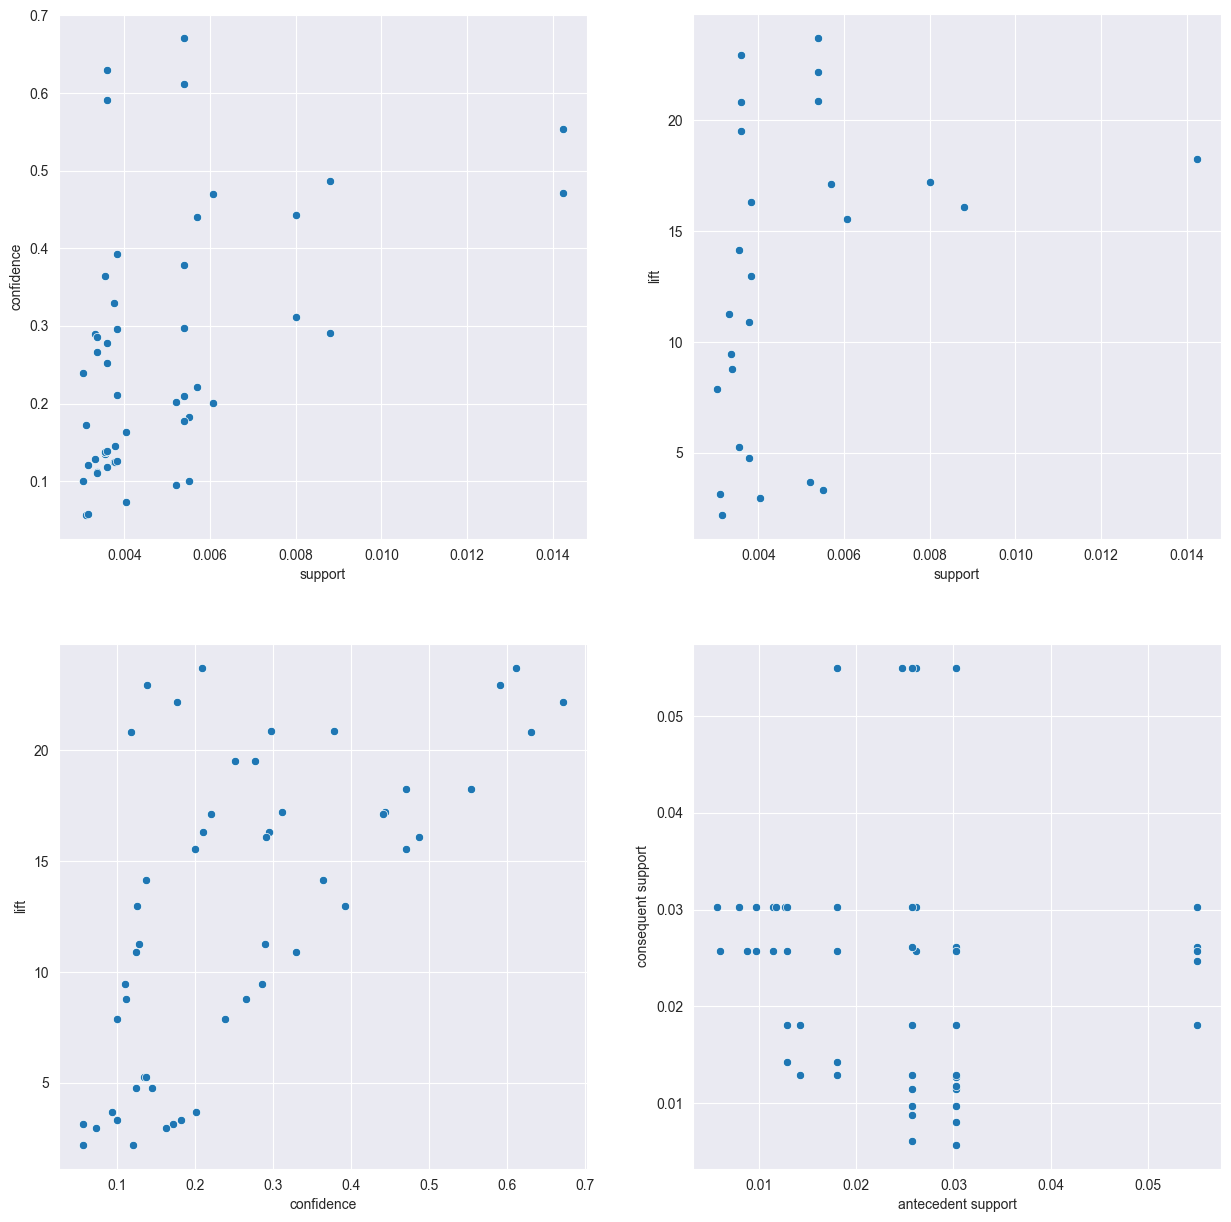

In [10]:
# Visualise the results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Setting up the style
plt.figure(figsize = (15, 15))
sns.set_style('darkgrid')
#Plotting the relationship between the metrics
plt.subplot(2,2,1)
sns.scatterplot(x="support", y="confidence",data=rules)
plt.subplot(2,2,2)
sns.scatterplot(x="support", y="lift",data=rules)
plt.subplot(2,2,3)
sns.scatterplot(x="confidence", y="lift",data=rules)
plt.subplot(2,2,4)
sns.scatterplot(x="antecedent support", y="consequent support",data=rules)
plt.show();

In [11]:
pip install networkx

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.7 MB 939.4 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.7 MB 939.4 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.7 MB 751.6 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.7 MB 751.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.7 MB 722.1 kB/s eta 0:00:03
   ------ --------------------------------- 0.3/1.7 MB 684.6 kB/s eta 0:00:03
   ------- -------------------------------- 0.3/1.7 MB 729.7 kB/s eta 0:00:02
   -------- ------------------------------- 0.4/1.7 MB 719.3 kB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.7 MB 860.2 kB/s eta 0:00:02
   ------------ ------


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import networkx as nx
import re

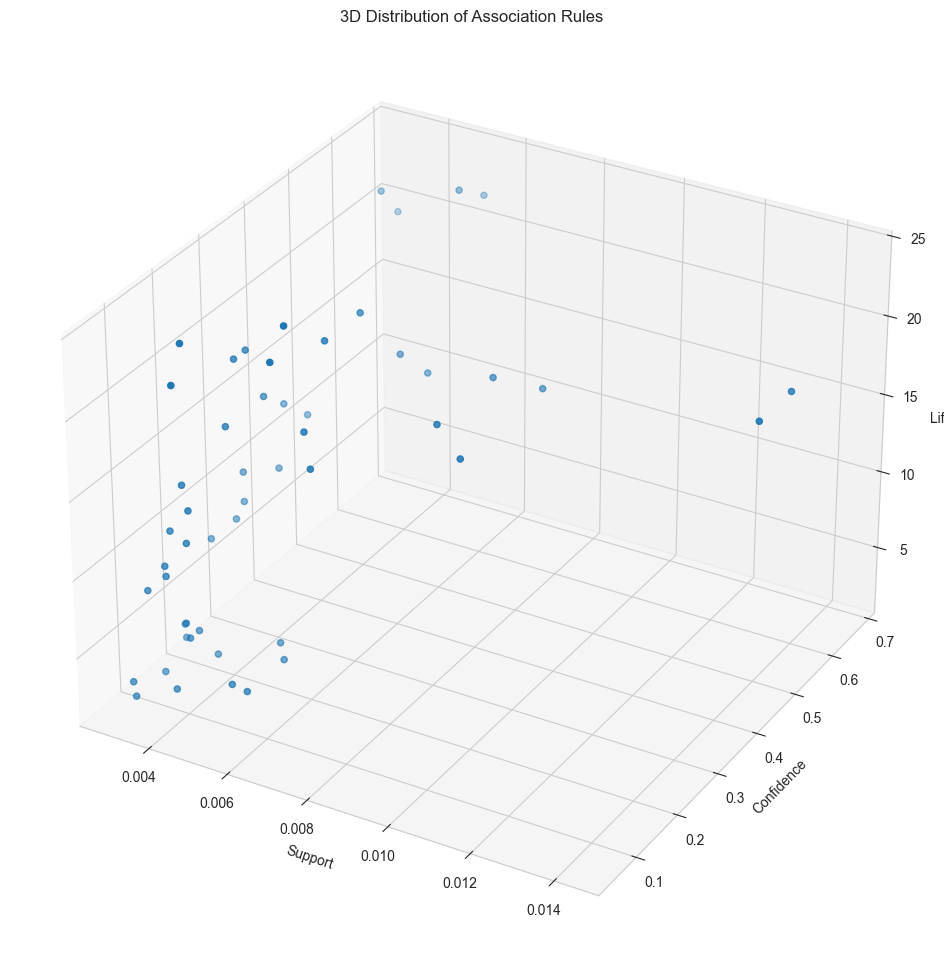

In [13]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Win 10\AppData\Local\Temp\ipykernel_816\3680248427.py:24: SyntaxWarning: invalid escape sequence '\d'
  if re.compile("^[R]\d+$").fullmatch(node) != None:


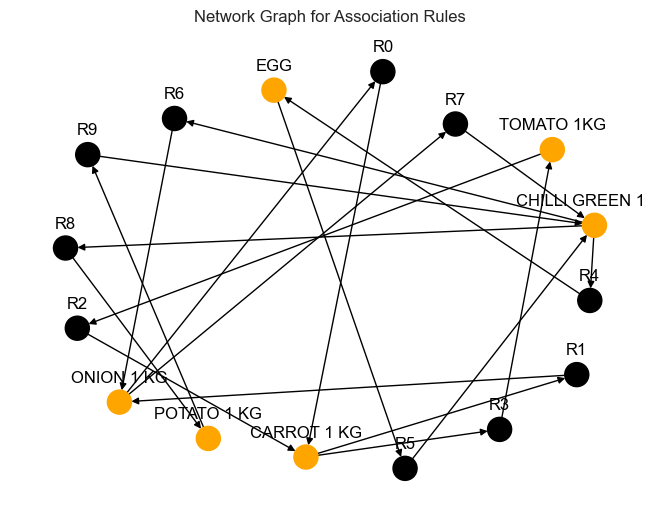

In [17]:
def draw_network(rules, rules_to_show):
  # Directional Graph from NetworkX
  network = nx.DiGraph()
  
  # Loop through number of rules to show
  for i in range(rules_to_show):
    
    # Add a Rule Node
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']: 
        # Add antecedent node and link to rule
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
    for consequents in rules.iloc[i]['consequents']:
        # Add consequent node and link to rule
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]  
  
  # For every node, if it's a rule, colour as Black, otherwise Orange
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')
  
  # Position nodes using spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Draw the network graph
  nx.draw(network, pos, node_color = color_map, font_size=8)            
  
  # Shift the text position upwards
  for p in pos:  
      pos[p][1] += 0.12

  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules, 10)

Business application

In [19]:
milk_rules = rules[rules['consequents'].astype(str).str.contains('EGG')]
milk_rules = milk_rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True)

display(milk_rules.head())

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ONION 1 KG),(EGG),0.025748,0.05502,0.005202,0.202046,3.672256,0.003786,1.184254,0.746920
1,(TOMATO 1KG),(EGG),0.030259,0.05502,0.005515,0.182263,3.312699,0.003850,1.155605,0.719915
2,(CHILLI GREEN 1 KG),(EGG),0.018093,0.05502,0.003112,0.171975,3.125696,0.002116,1.141246,0.692602
3,(MODERN WHOLE WHEAT BREAD 400G 35),(EGG),0.024695,0.05502,0.004033,0.163333,2.968640,0.002675,1.129459,0.679936
4,(LEMON FRUIT 1 NO),(EGG),0.026160,0.05502,0.003161,0.120831,2.196140,0.001722,1.074856,0.559286
